Model Comparison Table:

                    Model  Accuracy (%)  Precision (%)  Recall (%)  \
0     Logistic Regression           100            100         100   
1  Support Vector Machine           100            100         100   
2           Random Forest           100            100         100   
3       Gradient Boosting           100            100         100   
4     K-Nearest Neighbors           100            100         100   
5                 XGBoost           100            100         100   
6           Decision Tree           100            100         100   

   F1-Score (%)  
0           100  
1           100  
2           100  
3           100  
4           100  
5           100  
6           100  


C:\Users\prati\AppData\Local\Temp\ipykernel_21968\1268020078.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy (%)", y="Model", data=df_results, palette="viridis")


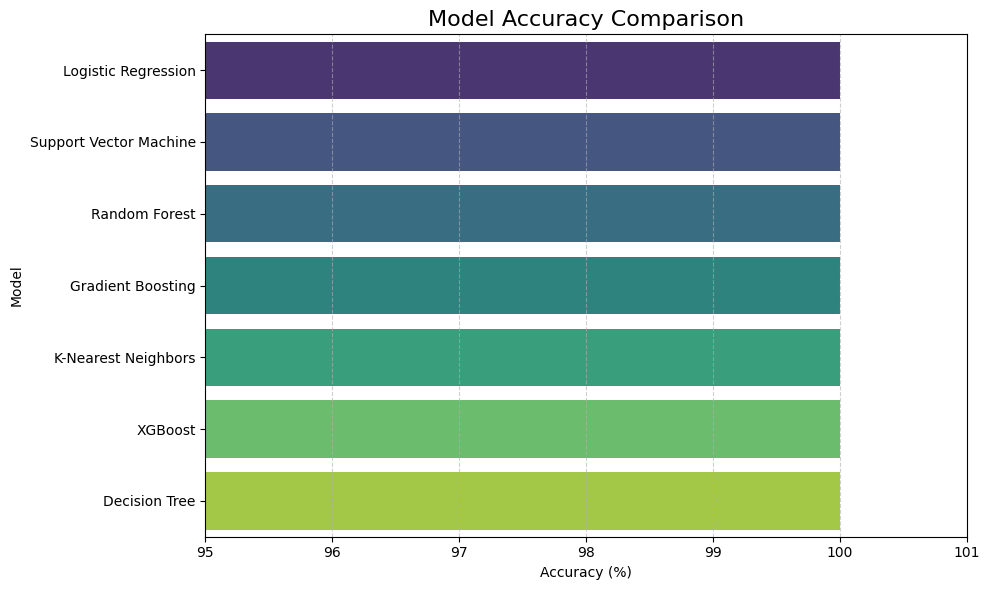

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your model results
results = {
    "Model": [
        "Logistic Regression",
        "Support Vector Machine",
        "Random Forest",
        "Gradient Boosting",
        "K-Nearest Neighbors",
        "XGBoost",
        "Decision Tree"
    ],
    "Accuracy (%)": [100, 100, 100, 100, 100, 100, 100],
    "Precision (%)": [100, 100, 100, 100, 100, 100, 100],
    "Recall (%)": [100, 100, 100, 100, 100, 100, 100],
    "F1-Score (%)": [100, 100, 100, 100, 100, 100, 100]
}

# Create DataFrame
df_results = pd.DataFrame(results)

# Display table
print("Model Comparison Table:\n")
print(df_results)

# Save as CSV for GitHub
df_results.to_csv("model_comparison.csv", index=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy (%)", y="Model", data=df_results, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.xlim(95, 101)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png", dpi=300)
plt.show()


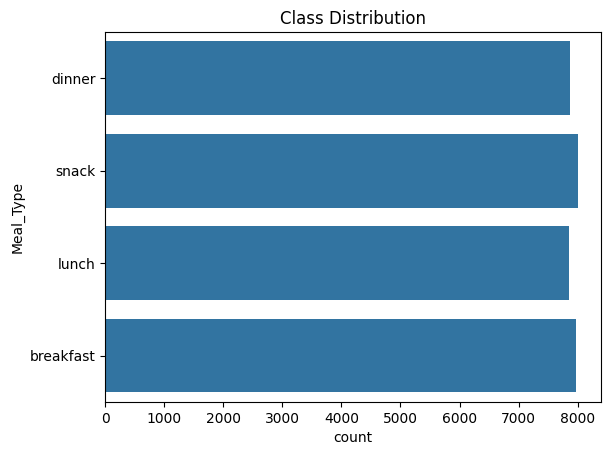


Class Counts:
Meal_Type
snack        8001
breakfast    7970
dinner       7873
lunch        7856
Name: count, dtype: int64

Accuracy Score: 0.2466876971608833

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.30      0.27      1603
           1       0.23      0.23      0.23      1501
           2       0.26      0.17      0.21      1588
           3       0.24      0.29      0.26      1648

    accuracy                           0.25      6340
   macro avg       0.25      0.25      0.24      6340
weighted avg       0.25      0.25      0.24      6340



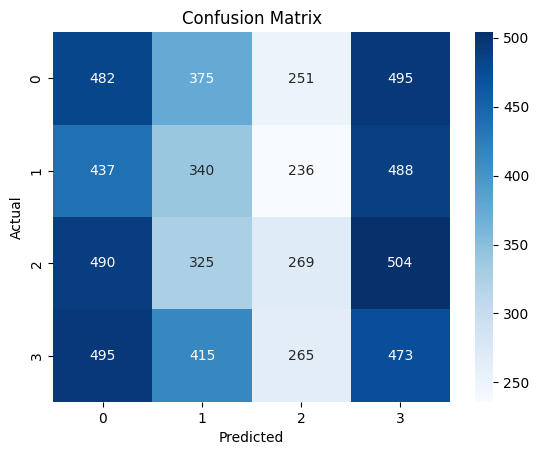

In [16]:
# =========================
# NutriClass: Food Classification Pipeline
# =========================

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2️⃣ Load dataset
df = pd.read_csv(r"C:\Users\prati\OneDrive\Desktop\guvi\project 3\synthetic_food_dataset_imbalanced.csv")

# 3️⃣ Class distribution visualization
sns.countplot(df['Meal_Type'])  
plt.title("Class Distribution")
plt.show()

print("\nClass Counts:")
print(df['Meal_Type'].value_counts())

# 4️⃣ Separate features and target
X = df.drop(columns=['Meal_Type'])  # Features
y = df['Meal_Type']  # Target

# 5️⃣ Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 6️⃣ Handle missing values
numerical_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

# Fill NaNs for numeric columns with mean
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Fill NaNs for categorical columns with mode
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# 7️⃣ One-hot encode categorical features
X_final = pd.get_dummies(X, drop_first=True)

# 8️⃣ Feature scaling
scaler = StandardScaler()
X_final[numerical_cols] = scaler.fit_transform(X_final[numerical_cols])

# 9️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_encoded, test_size=0.2, random_state=42
)

# 🔟 Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 1️⃣1️⃣ Prediction
y_pred_clean = model.predict(X_test)

# 1️⃣2️⃣ Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_clean))
print("\nClassification Report:\n", classification_report(y_test, y_pred_clean))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_clean)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
